In [1]:
# Begio et al. 2003 MLP languague model paper
# https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf

In [115]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt 
%matplotlib inline 

In [6]:
# read in all words
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [16]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [143]:
# build the dataset

block_size = 3
X, Y = [], []
for w in words:
    #print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        #print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

In [144]:
X.shape, Y.shape, X.dtype, Y.dtype

(torch.Size([228146, 3]), torch.Size([228146]), torch.int64, torch.int64)

In [38]:
C = torch.randn((27,2))

In [46]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [48]:
W1 = torch.randn((6,100)) # number of inputs is 6
b1 = torch.randn(100)

In [60]:
X[13,2]

tensor(1)

In [73]:
# we want to do emb @ W1 + b1
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1)
# but this is a bad way becaouse if we change the block_size we'll 
# have to change the code here

tensor([[ 1.0842, -0.6866,  1.0842, -0.6866,  1.0842, -0.6866],
        [ 1.0842, -0.6866,  1.0842, -0.6866, -0.6395,  1.2357],
        [ 1.0842, -0.6866, -0.6395,  1.2357, -1.2724,  0.6055],
        [-0.6395,  1.2357, -1.2724,  0.6055, -1.2724,  0.6055],
        [-1.2724,  0.6055, -1.2724,  0.6055,  0.3286, -0.9252],
        [ 1.0842, -0.6866,  1.0842, -0.6866,  1.0842, -0.6866],
        [ 1.0842, -0.6866,  1.0842, -0.6866, -0.2763, -0.5033],
        [ 1.0842, -0.6866, -0.2763, -0.5033,  1.0843,  0.2175],
        [-0.2763, -0.5033,  1.0843,  0.2175,  0.0412,  0.2237],
        [ 1.0843,  0.2175,  0.0412,  0.2237,  0.4448,  0.7151],
        [ 0.0412,  0.2237,  0.4448,  0.7151,  0.0412,  0.2237],
        [ 0.4448,  0.7151,  0.0412,  0.2237,  0.3286, -0.9252],
        [ 1.0842, -0.6866,  1.0842, -0.6866,  1.0842, -0.6866],
        [ 1.0842, -0.6866,  1.0842, -0.6866,  0.3286, -0.9252],
        [ 1.0842, -0.6866,  0.3286, -0.9252,  0.4448,  0.7151],
        [ 0.3286, -0.9252,  0.4448,  0.7

In [77]:
torch.cat(torch.unbind(emb, 1), 1).shape

torch.Size([32, 6])

In [91]:
emb.shape
# using torch.view is much more efficient
emb.view(-1,6)

tensor([[ 1.0842, -0.6866,  1.0842, -0.6866,  1.0842, -0.6866],
        [ 1.0842, -0.6866,  1.0842, -0.6866, -0.6395,  1.2357],
        [ 1.0842, -0.6866, -0.6395,  1.2357, -1.2724,  0.6055],
        [-0.6395,  1.2357, -1.2724,  0.6055, -1.2724,  0.6055],
        [-1.2724,  0.6055, -1.2724,  0.6055,  0.3286, -0.9252],
        [ 1.0842, -0.6866,  1.0842, -0.6866,  1.0842, -0.6866],
        [ 1.0842, -0.6866,  1.0842, -0.6866, -0.2763, -0.5033],
        [ 1.0842, -0.6866, -0.2763, -0.5033,  1.0843,  0.2175],
        [-0.2763, -0.5033,  1.0843,  0.2175,  0.0412,  0.2237],
        [ 1.0843,  0.2175,  0.0412,  0.2237,  0.4448,  0.7151],
        [ 0.0412,  0.2237,  0.4448,  0.7151,  0.0412,  0.2237],
        [ 0.4448,  0.7151,  0.0412,  0.2237,  0.3286, -0.9252],
        [ 1.0842, -0.6866,  1.0842, -0.6866,  1.0842, -0.6866],
        [ 1.0842, -0.6866,  1.0842, -0.6866,  0.3286, -0.9252],
        [ 1.0842, -0.6866,  0.3286, -0.9252,  0.4448,  0.7151],
        [ 0.3286, -0.9252,  0.4448,  0.7

In [93]:
h = emb.view(-1,6) @ W1 + b1
print(h.shape)
h

torch.Size([32, 100])


tensor([[ 0.1135,  3.0319, -0.3902,  ..., -4.7438, -0.7729, -0.3375],
        [-2.9865,  4.0693,  0.5317,  ..., -4.0000,  0.9762, -1.0733],
        [-2.3678,  1.6744,  1.3119,  ..., -0.7264, -0.3911, -1.1906],
        ...,
        [-1.1539,  1.0592,  1.0292,  ...,  0.5560,  0.4982, -0.0511],
        [ 0.5695, -1.1024,  1.3213,  ...,  2.1023,  1.3167,  1.1397],
        [ 1.6760, -1.2278, -1.4130,  ...,  1.0866,  0.1989,  0.3191]])

In [96]:
W2 = torch.randn(100, 27)
b2 = torch.randn(27)

In [97]:
logits = h @ W2 + b2

In [122]:
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True)
loss = - probs[torch.arange(32), Y].log().mean()
# 3 previous lines are equal to:
# F.cross_entropy(logits, Y)

In [116]:
loss = F.cross_entropy(logits, Y)

tensor(36.9321)

In [129]:
# ------ resume with generator ------ #

In [168]:
X.shape, Y.shape # dataset

(torch.Size([228146, 3]), torch.Size([228146]))

In [183]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2), generator=g)
W1 = torch.randn((6,100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [184]:
sum(p.nelement() for p in parameters) # number of total parameters

3481

In [185]:
for p in parameters:
    p.requires_grad = True

In [186]:
learning_rates_exp = torch.linspace(-3, 0, 1000)
learning_rates = 10**learning_rates_exp

In [187]:
learning_rate_used = []
losses = []

for i in range(1000):
    
    # minibatch construct
    ix = torch.randint(0, X.shape[0], (32,))
    
    # forward pass
    emb = C[X[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y[ix])
    #print(loss.item())

    # backward paas
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    lr = learning_rates[i]
    for p in parameters:
        p.data += -lr * p.grad
        
    # track stats
    learning_rate_used.append(learning_rates_exp[i])
    losses.append(loss.item())
    

In [188]:
# the minibatch gradient descent does not use the exact gradient direction but It's 
# still a good option in practise

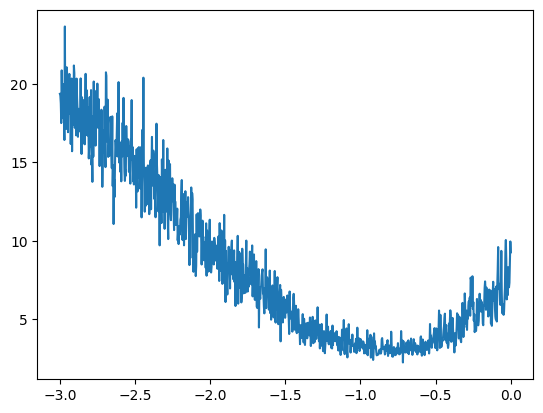

In [189]:
plt.plot(learning_rate_used, losses)

In [190]:
# Now we know that 10^-1 is a good learning rate